In [65]:
import json
import re
from nltk import word_tokenize
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [51]:
logs = list()
with open('queries-2021-07-19-11-58-42-args-me-6999bf8866-85grs.log', 'r', encoding='utf-8') as file:
    for line in file.readlines():
        line = line.lstrip()
        logs.append(json.loads(line))
        
with open('queries-2021-05-06-11-41-59-args-me-6999bf8866-p7bj7.log', 'r', encoding='utf-8') as file:
    for line in file.readlines():
        line = line.lstrip()
        logs.append(json.loads(line))

In [52]:
len(logs)

1796167

In [53]:
queries = {l['text'] for l in logs if l['url'].startswith('http://www.args.me/search')}

In [54]:
len(queries)

901

In [55]:
def clean(query):
    query = query.strip()
    query = re.sub(r'"', '', query)
    query = re.sub('\'', '', query)
    return query

def keep(query):
    if len(query) <1:
        return False
    
    return True

In [56]:
queries = list(filter(keep, map(clean, queries)))

In [57]:
tokens = list(map(word_tokenize, queries))

In [58]:
lengths = np.array(list(map(len, tokens)))

In [59]:
lengths

array([ 3,  1,  1,  3,  3,  1,  2,  1,  3,  1,  7,  4,  3,  2,  6,  2,  1,
        1,  1,  1,  2,  1,  6,  1,  2,  6,  1,  1,  1,  1,  3,  2,  2,  2,
        3,  1,  9,  1,  2,  2,  2,  2,  2,  2,  5,  1,  4,  1,  3, 11,  2,
        2,  2,  1,  3,  1,  2,  1,  6,  1,  2,  2,  1,  2,  2,  2,  2,  5,
        2,  3,  1,  1, 11,  1,  3,  1,  1,  2,  2,  2,  2,  2,  1,  7,  1,
        8,  1,  1,  1,  1,  2,  2,  1,  2,  2,  1,  1,  1,  1,  1,  5,  4,
        1,  1,  2,  2, 72,  1,  2,  4,  4,  2,  1,  3,  3,  4,  1,  2,  1,
        1,  1,  2,  1,  4,  1,  1,  1,  5,  2,  1,  1,  1,  1,  2,  1,  1,
        3,  1,  3,  2,  1,  2,  2,  2,  2,  1,  1,  1,  2,  2,  3,  2,  1,
        4,  1,  1,  1,  5,  5,  1,  1,  1,  2,  1,  2,  2,  1,  2,  2,  2,
        5,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  2,  1,  1,  1,  6,
        5,  1,  1,  1,  1,  1,  2,  2,  5,  4,  2,  1,  1,  1,  3,  1,  1,
        3,  2,  6,  2,  1,  1,  1,  2,  1,  2,  1,  1,  1,  3,  1,  2,  2,
        1,  1,  1,  1, 10

(array([879.,  19.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

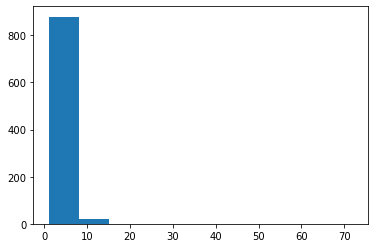

In [67]:
plt.hist(lengths)

In [60]:
print(f'mean\t{lengths.mean()}')
print(f'std\t{lengths.std()}')
print(f'median\t{np.median(lengths)}')

mean	2.4066666666666667
std	3.1705520024121987
median	2.0


In [64]:
list(map(lambda b:" ".join(b), filter(lambda a: len(a)>=10, tokens)))

['would you like to live in the world of harry potter',
 'The corona virus is the result of a lab accident .',
 'Only the moderately well-off pay inheritance tax . The very rich employ expert accountants and lawyers to avoid the tax . Its therefore not the tax on the mega-wealthy that you might like - its a tax on the moderately successful , thrifty professional classes . And yes , plenty of them do emigrate . I know of at least a dozen who have emigrated to Switzerland precisely for that reason .',
 'Berlin Huguenots switch to German from French in their services',
 'which way is more interesting to live in the world',
 'Should students have to wear school uniforms ? < /',
 'does Narender modi win the election of 2024 in india',
 'One problem might be that I thought we could use the args.me snippets as a baseline , but when I paste the full question into args.me , I get no results .',
 'In early childhood education for sustainable developement is no matter',
 'The very rich employ exp

# Wiki Controversies

In [43]:
wiki_c = list()
with open('wiki_controversies.txt', 'r', encoding='utf-8') as file:
    for line in file.readlines():
        line = line.lstrip()
        wiki_c.append(line)

In [44]:
len(wiki_c)

1507

In [46]:
wiki_c_tokens = list(map(word_tokenize, wiki_c))

In [47]:
wiki_c_lengths = np.array(list(map(len, wiki_c_tokens)))

In [48]:
wiki_c_lengths

array([4, 1, 2, ..., 4, 2, 2])

(array([461., 745., 184.,  63.,   0.,  29.,  15.,   6.,   2.,   2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

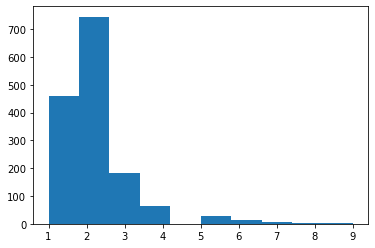

In [68]:
plt.hist(wiki_c_lengths)

In [61]:
wiki_c_lengths.max()

9

In [49]:
print(f'mean\t{wiki_c_lengths.mean()}')
print(f'std\t{wiki_c_lengths.std()}')
print(f'median\t{np.median(wiki_c_lengths)}')

mean	2.0345056403450563
std	1.0671563297776527
median	2.0


In [71]:
lengths.shape

(900,)

"null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y." [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [74]:
stats.mannwhitneyu(lengths, wiki_c_lengths)

MannwhitneyuResult(statistic=638443.5, pvalue=0.005232828867098179)

Since p-value is smaller than 5%, thus, we reject the null hypothesis: Significant difference between the length of the two query sets.